# League Training


In [1]:
from league_training import LeagueTrainer

### 1. Load config

In [3]:
class TrainingConfig():
    def __init__(self):
        #---------- Overall config
        self.wandb_project_name = "MARL-CTF-Test"
        self.exp_name = "Agent metrics logging"
        self.use_wandb_selfplay = True
        self.use_wandb_ppo = False
        self.seed = 42

        #---------- Self-play config
        self.number_of_iterations = 5
        self.number_of_duels = 3
        self.n_main_agents = 5
        self.n_exploiters = 3
        self.n_historical_agents = 10
        self.main_agent_update_interval = 5
        self.exploiter_update_interval = 2
        self.historical_update_interval = 2
        self.max_win_rate_diff = 1.0

        #---------- Environment config
        self.use_ego_state = True
        self.env_config = {
            'GRID_SIZE':8,
            'AGENT_CONFIG':{
                0: {'team':0, 'type':0},
                1: {'team':1, 'type':0},
                2: {'team':0, 'type':1},
                3: {'team':1, 'type':1},
            },
            'GAME_STEPS': 256,
            'USE_ADJUSTED_REWARDS': False,
            'RANDOMISE_FLAG_POSITIONS': False,
            'HOME_FLAG_CAPTURE': True,
            'ENABLE_OBSTACLES': False,
            'MAX_BLOCK_TILE_PCT': 0.05
        }

        #---------- PPO Config
        self.learning_rate = 0.0003
        self.total_timesteps = 10000
        self.torch_deterministic = True
        self.cuda = True
        self.wandb_entity = None
        self.capture_video = False
        self.parallel_rollouts = False
        self.num_envs = 4
        self.num_agents = 1
        self.num_steps = 256
        self.anneal_lr = False
        self.gae = True
        self.gamma = 0.95
        self.gae_lambda = 0.96
        self.num_minibatches = 4
        self.update_epochs = 4
        self.norm_adv = False
        self.clip_coef = 0.2
        self.clip_vloss = True
        self.ent_coef = 0.01
        self.vf_coef = 0.5
        self.max_grad_norm = 0.5
        self.target_kl = None
        self.batch_size = int(self.num_envs * self.num_steps * self.num_agents)
        self.minibatch_size = int(self.batch_size // self.num_minibatches)
        self.device = 'cpu'

        #---------- Metrics config

args = TrainingConfig()

### 2. Train agents

In [4]:
league_trainer = LeagueTrainer(args)
league_trainer.train_league()

Iteration: 0 Training main agent 4 vs exploiter agent 0
i: 1	 ar: -80.0000	 mx: 0.0	 lr: 0.0003	 vl: 0.0001	 pl: 0.0514	 ent: 1.3765	
i: 2	 ar: -59.5000	 mx: 21.0	 lr: 0.0003	 vl: 0.0	 pl: 0.0314	 ent: 1.3753	
i: 3	 ar: -66.3300	 mx: 21.0	 lr: 0.0003	 vl: 0.0	 pl: 0.0074	 ent: 1.3787	
i: 4	 ar: -59.5000	 mx: 21.0	 lr: 0.0003	 vl: 0.0	 pl: 0.0003	 ent: 1.383	
i: 5	 ar: -55.4000	 mx: 21.0	 lr: 0.0003	 vl: 0.0	 pl: -0.0005	 ent: 1.3851	
i: 6	 ar: -52.6700	 mx: 21.0	 lr: 0.0003	 vl: 0.0011	 pl: -0.0076	 ent: 1.3787	
i: 7	 ar: -56.5700	 mx: 21.0	 lr: 0.0003	 vl: 0.0001	 pl: 0.0065	 ent: 1.3831	


### 3. Test Trained Policies

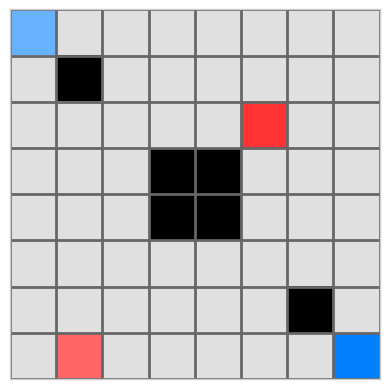

256 2 0


(2, 0)

In [10]:
agent = league_trainer.main_agents[0]
opponent = league_trainer.main_agents[2]
league_trainer.duel(agent, opponent, render=True, sleep_time=0.2)